## Imports

In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

## Funções


In [36]:
def renderPGM(img, axis='on'):
    """
    Renderiza uma imagem no formato PGM/Array Numpy utilizando a biblioteca Pillow e exibe a imagem com Matplotlib.

    Parâmetros:
    -----------
    img : str
        O caminho para o arquivo da imagem no formato PGM.
    
    axis : str
        Define a exibição dos eixos da imagem. Pode ser 'on' para mostrar os eixos ou 'off' para ocultá-los.
    
    Funcionalidade:
    ---------------
    A função carrega a imagem fornecida no formato PGM, renderiza-a em tons de cinza e exibe-a
    utilizando a função `imshow` da biblioteca Matplotlib. O parâmetro `axis` controla a visibilidade
    dos eixos na renderização da imagem.
    """
    try:
        # Carrega a imagem PGM
        imagem = Image.open(img)
       
        # Exibe a imagem
        plt.imshow(imagem, cmap='gray')
        plt.axis(axis)  # Oculta ou exibe os eixos conforme o parâmetro
        #plt.show()
        
    except:
        # Carrega a imagem de um array
        # Exibe a imagem
        plt.imshow(img, cmap='gray')
        plt.axis('on')  # Oculta ou exibe os eixos conforme o parâmetro
        #plt.show()


In [17]:
def apply_median_filter_1d(image_path, filter_size=9):
    """
    Aplica um filtro de mediana em uma imagem em escala de cinza, utilizando uma janela de vizinhança de tamanho especificado.

    Parâmetros:
    -----------
    image_path : str
        Caminho para o arquivo da imagem a ser processada.
    
    filter_size : int, opcional
        O tamanho da janela do filtro de mediana (deve ser um número ímpar). 
        O valor padrão é 9, o que significa que uma janela 9x9 será usada.

    Retorna:
    --------
    numpy.ndarray
        A imagem resultante após a aplicação do filtro de mediana. O tamanho e a dimensão da imagem são preservados, mas cada pixel 
        é substituído pela mediana de seus vizinhos, ajudando a remover ruídos enquanto preserva as bordas.

    Funcionalidade:
    ---------------
    1. Carrega a imagem a partir do caminho especificado e a converte para escala de cinza.
    2. Converte a imagem carregada em uma matriz NumPy para facilitar o processamento.
    3. Para cada pixel da imagem, coleta os valores dos vizinhos de acordo com o tamanho do filtro (`filter_size`).
    4. Calcula a mediana desses valores e substitui o valor do pixel original pela mediana.
    5. Retorna a imagem filtrada como um array NumPy.

    Exemplo de uso:
    ---------------
    output_image = apply_median_filter_1d('caminho/para/imagem.pgm', filter_size=9)
    """

    # Carregar a imagem a partir do caminho
    # Converte a imagem para escala de cinza 0 a 255
    image = Image.open(image_path).convert('L')
    
    # Converte a imagem em uma matriz NumPy
    image_np = np.array(image)
    
    # Tupla resultado da matriz Numpy
    altura, largura = image_np.shape

    #Cria uma cópia da imagem
    output_image = image_np.copy()

    # Percorre todos os pixels
    for i in range(altura):
        for j in range(largura):
            # Define os limites da vizinhança pelo pixel central
            # Define o tamanho da vizinhança pelo filter_size , padrão 9
            vizinhos = []
            for di in range(-filter_size//2, filter_size//2 + 1):
                for dj in range(-filter_size//2, filter_size//2 + 1):
                    ni, nj = i + di, j + dj
                    
                    # Verifica se o deslocamento da imagem está dentro da mesma
                    # Adiciona os pixeis encontrados em um array vizinhos
                    if 0 <= ni < altura and 0 <= nj < largura:
                        vizinhos.append(image_np[ni, nj])
            
            # Ordena e pega a mediana
            output_image[i, j] = np.median(vizinhos)
    
    return output_image

## Programa

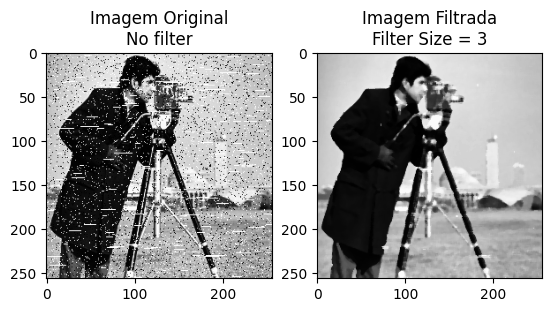

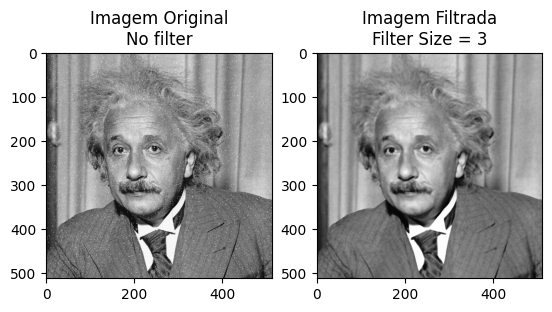

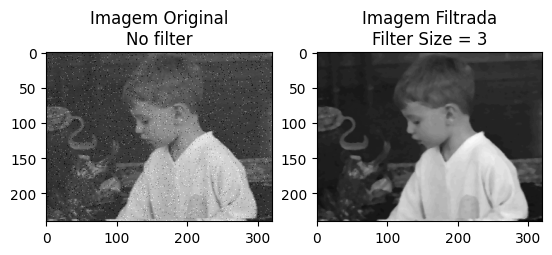

In [46]:
# Parametro dos vizinhos 
paramMedian = 3

# Percorre os arquivos
# Executa as funções
# Plota os resultados

for file in os.listdir('pgm'):
    fileToFilter = 'pgm/' + file
    imagemFiltered = apply_median_filter_1d(fileToFilter,paramMedian)

    #Plota a imagem original
    plt.subplot(1,2,1)
    plt.title(f'Imagem Original\nNo filter')
    renderPGM(fileToFilter)

    #Plot a imagem Filtrada
    plt.subplot(1,2,2)
    plt.title(f'Imagem Filtrada\nFilter Size = {paramMedian}')
    renderPGM(imagemFiltered)

    plt.show()